In [9]:
!pip install -q pyannote.audio pyannote.core

import torch
import numpy as np
import os

In [2]:
# speaker embedding model trained on AMI training set
emb = torch.hub.load('pyannote/pyannote-audio', 'emb_ami')

Using cache found in C:\Users\MrBrito/.cache\torch\hub\pyannote_pyannote-audio_master


C:\Users\MrBrito\miniconda3\lib\site-packages\pyannote\audio\embedding\approaches\arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)


0


In [43]:
directory='C:\\Users\\MrBrito\\Documents\\_Grad_School\\Rotations\\Satra\\egemaps_analysis\\Hellos\\input'

X, sid_per_sample = [], []
for filename in os.listdir(directory):
    if filename.endswith(".wav"): 
        one_file = {'uri': 'filename', 'audio': os.path.join(directory, filename)}
        embeddings = emb(one_file)
        X.append(np.mean(embeddings, axis=0))

        # keep track of speaker label (for later scatter plot)
        sid_per_sample.append(filename[0:2])

X = np.vstack(X)
sid, y_true = np.unique(sid_per_sample, return_inverse=True)

C:\Users\MrBrito\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


Text(0.5, 1.0, 'tSNE plot of four participants')

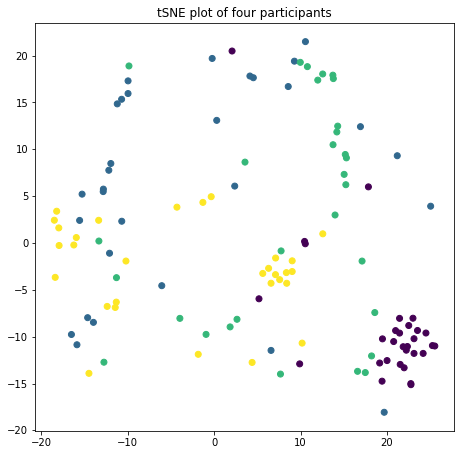

In [79]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, metric="cosine")
X_2d = tsne.fit_transform(X)

# plot 
fig, ax = plt.subplots()
fig.set_figheight(7.5)
fig.set_figwidth(7.5)
plt.scatter(*X_2d[:120,:].T, c=y_true[:120])
#plt.legend(y_true[:120], loc='center left', bbox_to_anchor=(1.0, 0.75))
plt.title("tSNE plot of four participants")

Text(0.5, 1.0, 'UMAP plot of four participants')

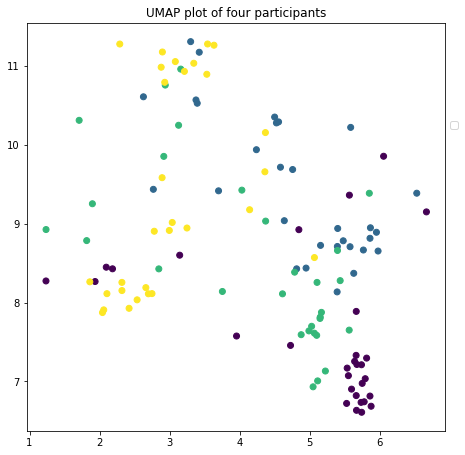

In [81]:
import umap

reducer=umap.UMAP()
X_2dU =reducer.fit_transform(X)

# plot 
fig, ax = plt.subplots()
fig.set_figheight(7.5)
fig.set_figwidth(7.5)
plt.legend(y_true[:120], loc='center left', bbox_to_anchor=(1.0, 0.75))
plt.scatter(*X_2dU[:120,:].T, c=y_true[:120])
plt.title("UMAP plot of four participants")